# Problem Statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Target

To prdeict Attrition for based on given data

In [750]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [751]:
hr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [752]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [753]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [754]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [755]:
hr['Over18']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object

In [756]:
print(hr.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [757]:
print(hr.eq('').sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

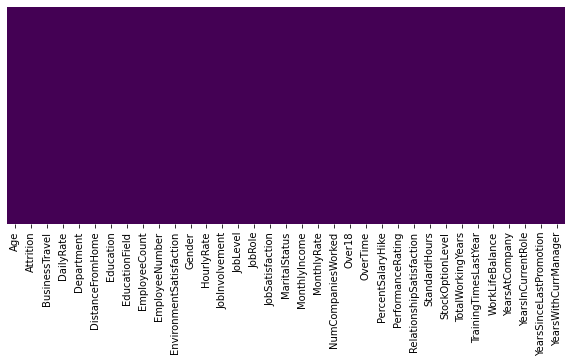

In [758]:
plt.figure(figsize =(10, 4))
sns.heatmap(hr.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [759]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [760]:
hr.shape

(1470, 35)

In [761]:
hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [762]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

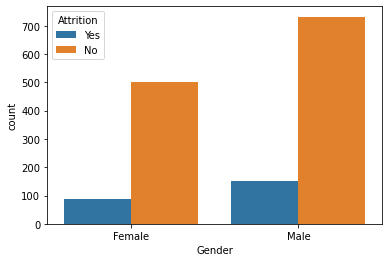

In [763]:
sns.countplot('Gender', hue='Attrition', data=hr)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

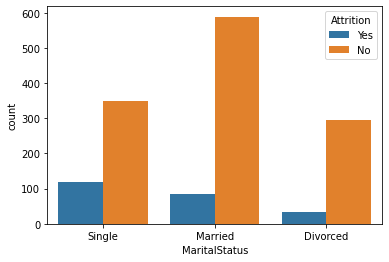

In [764]:
sns.countplot('MaritalStatus', hue='Attrition', data=hr)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

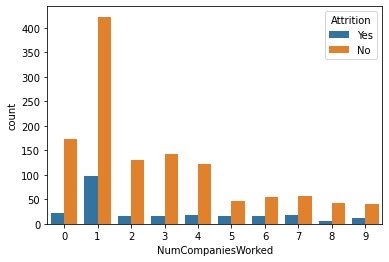

In [765]:
sns.countplot('NumCompaniesWorked', hue='Attrition', data=hr)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

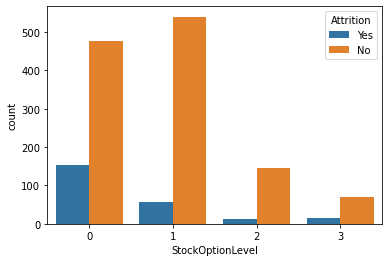

In [766]:
sns.countplot('StockOptionLevel', hue='Attrition', data=hr)

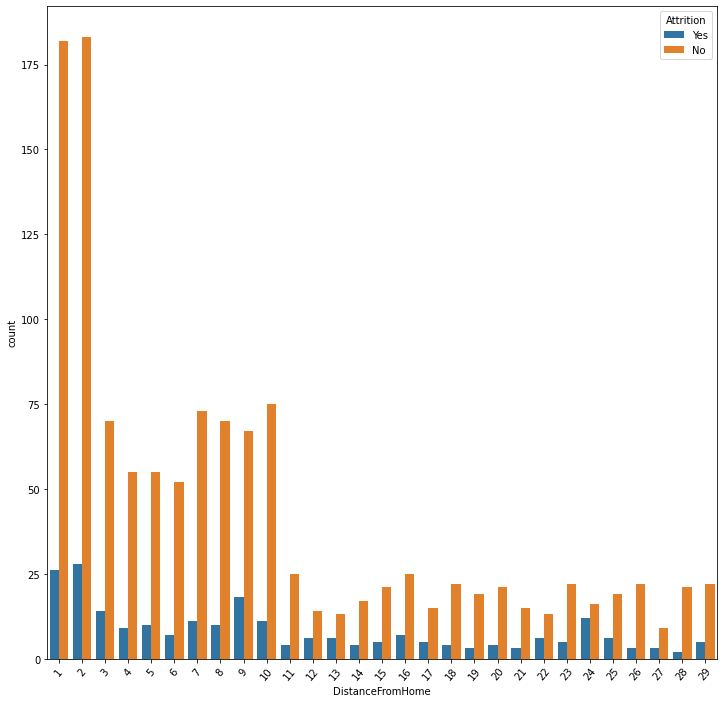

In [767]:
plt.figure(figsize=(12,12))
sns.countplot('DistanceFromHome', hue='Attrition', data=hr)
plt.xticks(rotation=50)
plt.show()

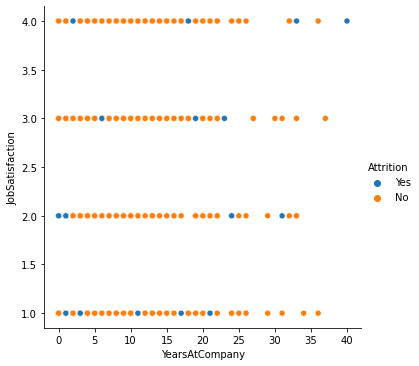

In [768]:
sns.relplot(x= "YearsAtCompany", y= "JobSatisfaction", hue = "Attrition", data = hr)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

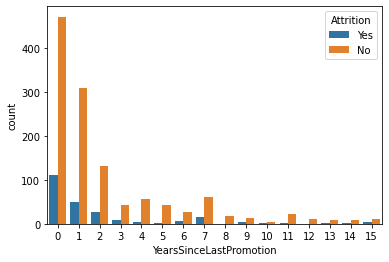

In [769]:
sns.countplot(x= "YearsSinceLastPromotion",  hue = "Attrition",data = hr)

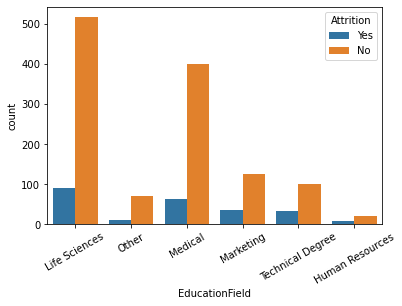

In [770]:
sns.countplot('EducationField', hue='Attrition', data=hr)
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

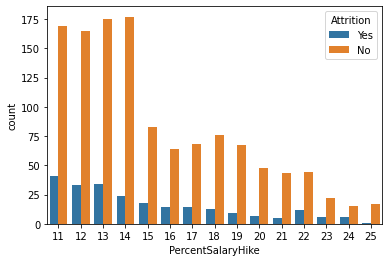

In [771]:
sns.countplot('PercentSalaryHike', hue='Attrition', data=hr)

<AxesSubplot:>

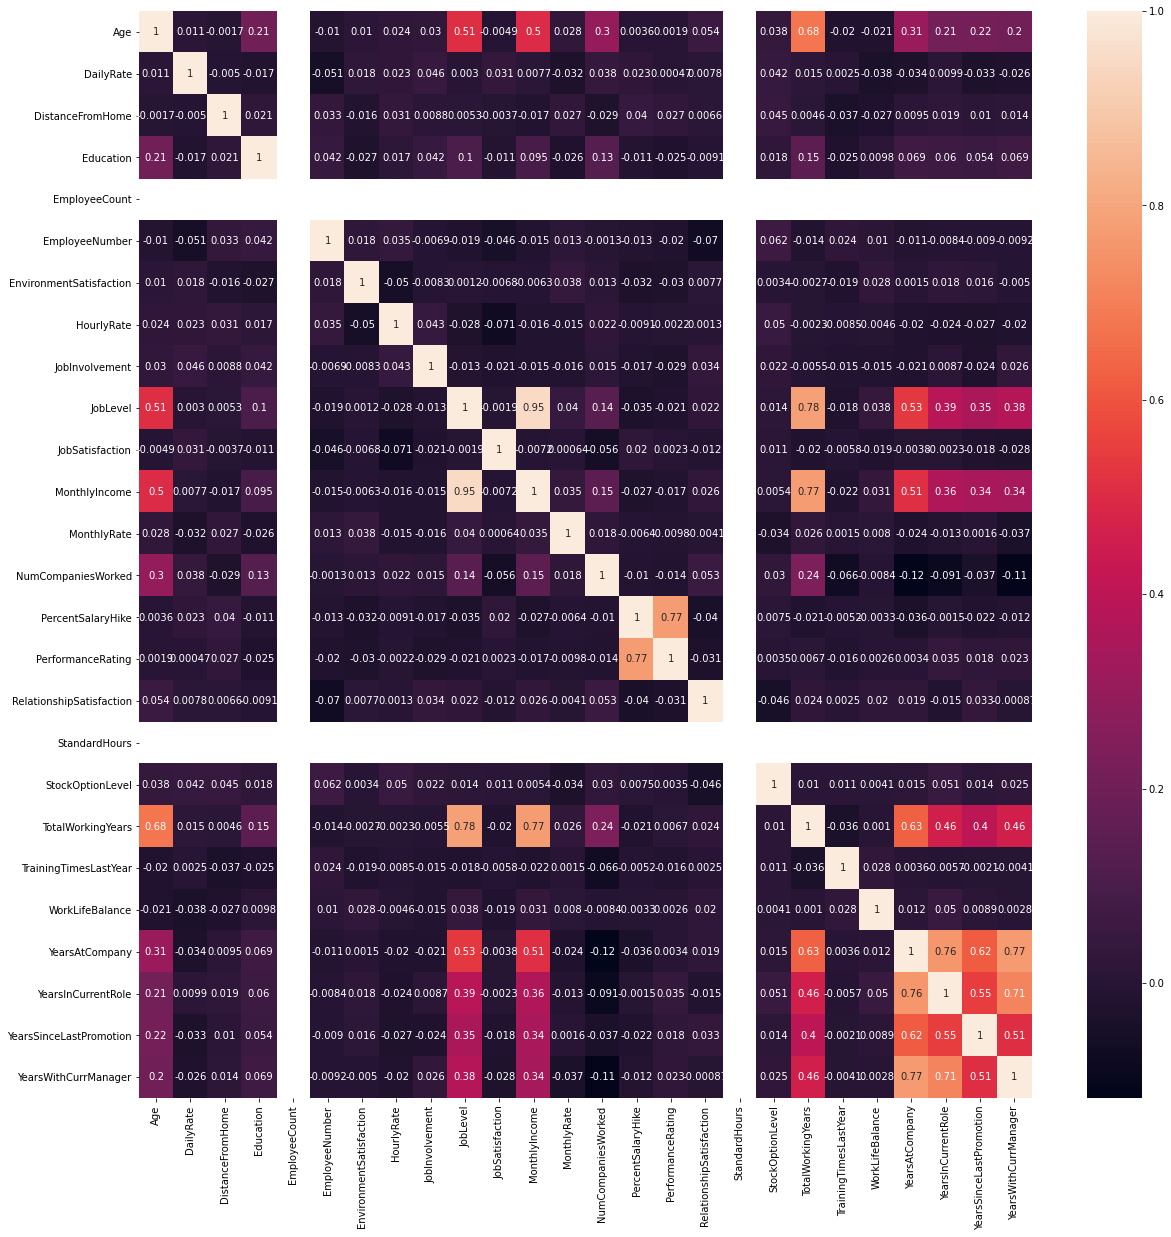

In [772]:
plt.figure(figsize=(20,20))
sns.heatmap(hr.corr(),color = "blue", annot=True)

In [773]:
numerical_columns = ['Age', 'DailyRate', 
       'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel',  'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction',  'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
numerical_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [774]:
categorical_columns= ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
           'JobRole', 'MaritalStatus', 'OverTime','Over18'] 
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Over18']

In [775]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [776]:
hr=hr[['Age', 'DailyRate', 
       'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel',  'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction',  'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
           'JobRole', 'MaritalStatus', 'OverTime']]
hr


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,3,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,39,613,6,1,4,42,2,3,1,9991,...,1,7,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,27,155,4,3,2,87,4,2,2,6142,...,0,3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,8,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [777]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   DailyRate                 1470 non-null   int64 
 2   DistanceFromHome          1470 non-null   int64 
 3   Education                 1470 non-null   int64 
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   HourlyRate                1470 non-null   int64 
 6   JobInvolvement            1470 non-null   int64 
 7   JobLevel                  1470 non-null   int64 
 8   JobSatisfaction           1470 non-null   int64 
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  PercentSalaryHike         1470 non-null   int64 
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

# Removing outliers

<AxesSubplot:>

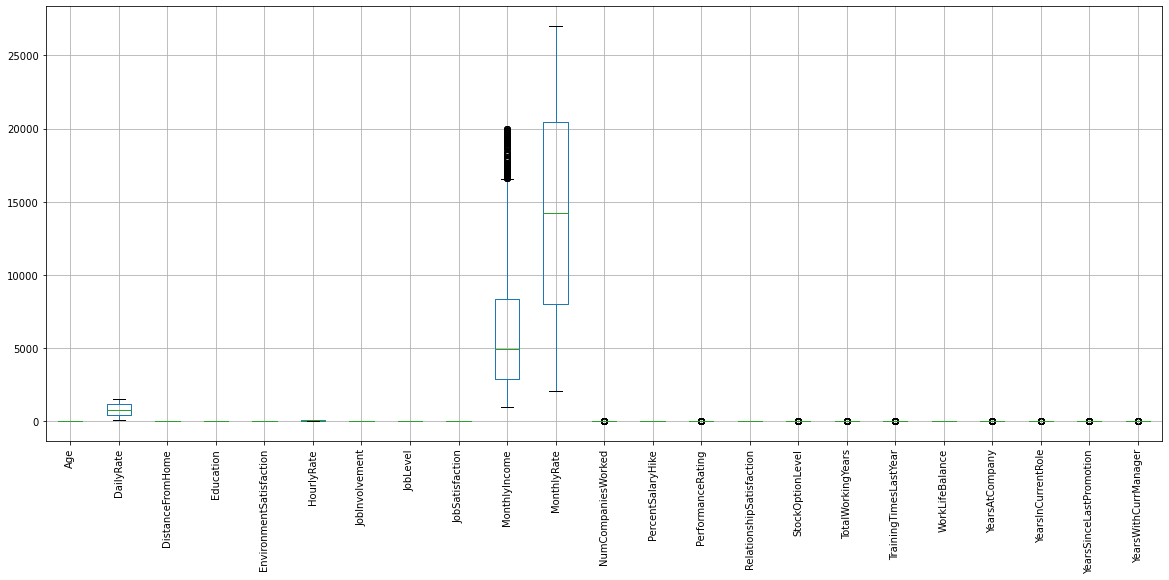

In [778]:
hr[numerical_columns].boxplot( rot = 90, figsize=(20,8))


In [779]:
from scipy.stats import zscore
z=np.abs(zscore(hr.iloc[:,:-8]))



In [780]:
hr_new=hr[(z<3).all(axis=1)]

In [781]:
hr.shape


(1470, 31)

In [782]:
hr_new.shape

(1387, 31)

In [783]:
hr=hr_new

# Removing Skewness

In [784]:
hr[numerical_columns].skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

<AxesSubplot:ylabel='Frequency'>

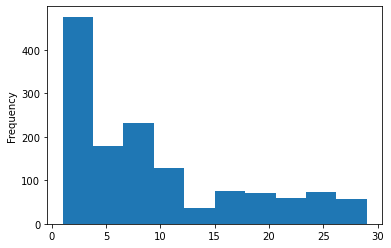

In [785]:
hr['DistanceFromHome'].plot.hist()

-0.00814050988635005


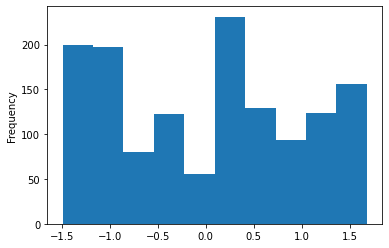

In [786]:
hr['DistanceFromHome']=power_transform(hr[['DistanceFromHome']], method='yeo-johnson')
hr['DistanceFromHome'].plot.hist()
print(skew(hr['DistanceFromHome']))

<AxesSubplot:ylabel='Frequency'>

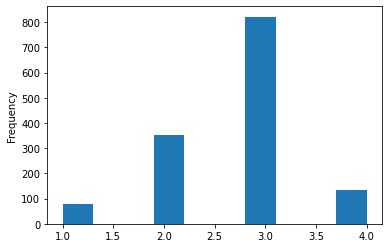

In [787]:
hr['JobInvolvement'].plot.hist()

-0.018780194470743933


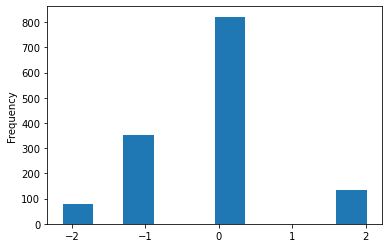

In [788]:
hr['JobInvolvement']=power_transform(hr[['JobInvolvement']], method='yeo-johnson')
hr['JobInvolvement'].plot.hist()
print(skew(hr['JobInvolvement']))

<AxesSubplot:ylabel='Frequency'>

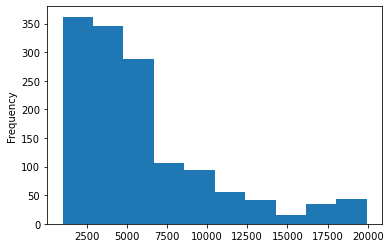

In [789]:
hr['MonthlyIncome'].plot.hist()

0.027669714682113603


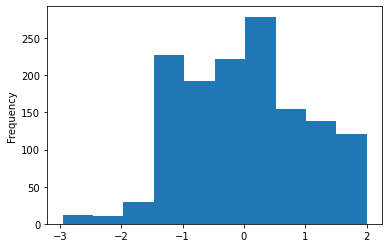

In [790]:
hr['MonthlyIncome']=power_transform(hr[['MonthlyIncome']], method='yeo-johnson')
hr['MonthlyIncome'].plot.hist()
print(skew(hr['MonthlyIncome']))

<AxesSubplot:ylabel='Frequency'>

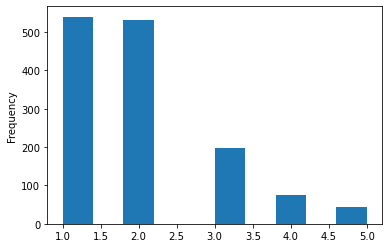

In [791]:
hr['JobLevel'].plot.hist()

0.11064957518146379


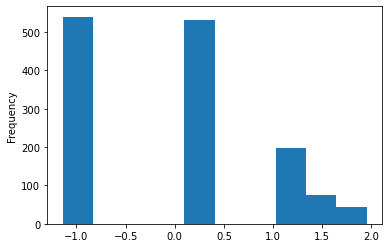

In [792]:

hr['JobLevel']=power_transform(hr[['JobLevel']], method='yeo-johnson')
hr['JobLevel'].plot.hist()
print(skew(hr['JobLevel']))

<AxesSubplot:ylabel='Frequency'>

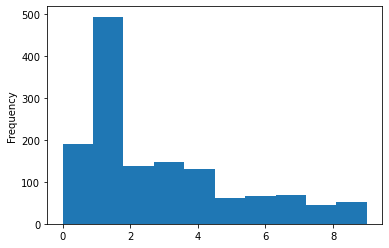

In [793]:
hr['NumCompaniesWorked'].plot.hist()

0.016157352401939173


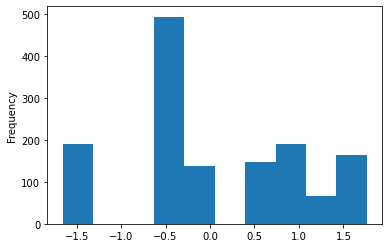

In [794]:

hr['NumCompaniesWorked']=power_transform(hr[['NumCompaniesWorked']], method='yeo-johnson')
hr['NumCompaniesWorked'].plot.hist()
print(skew(hr['NumCompaniesWorked']))

<AxesSubplot:ylabel='Frequency'>

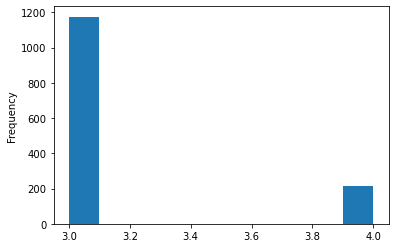

In [795]:
hr['PerformanceRating'].plot.hist()


0.0


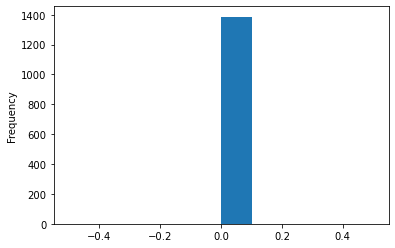

In [796]:
hr['PerformanceRating']=power_transform(hr[['PerformanceRating']], method='yeo-johnson')
hr['PerformanceRating'].plot.hist()
print(skew(hr['PerformanceRating']))

<AxesSubplot:ylabel='Frequency'>

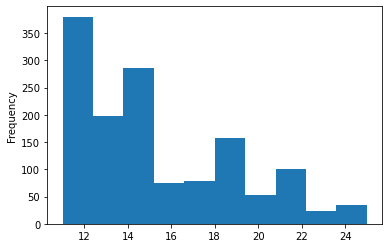

In [797]:
hr['PercentSalaryHike'].plot.hist()


0.11200668033446366


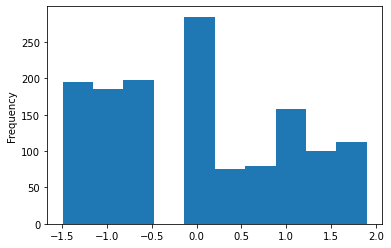

In [798]:
hr['PercentSalaryHike']=power_transform(hr[['PercentSalaryHike']], method='yeo-johnson')
hr['PercentSalaryHike'].plot.hist()
print(skew(hr['PercentSalaryHike']))

<AxesSubplot:ylabel='Frequency'>

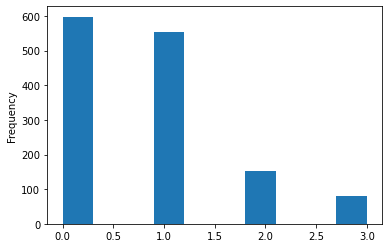

In [799]:
hr['StockOptionLevel'].plot.hist()


0.08983216592083945


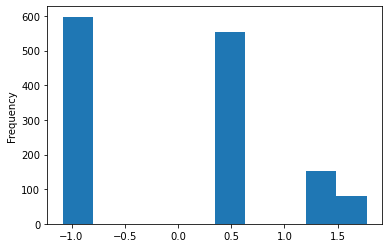

In [800]:
hr['StockOptionLevel']=power_transform(hr[['StockOptionLevel']], method='yeo-johnson')
hr['StockOptionLevel'].plot.hist()
print(skew(hr['StockOptionLevel']))

<AxesSubplot:ylabel='Frequency'>

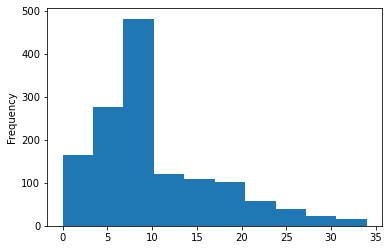

In [801]:
hr['TotalWorkingYears'].plot.hist()


-0.009655553678898789


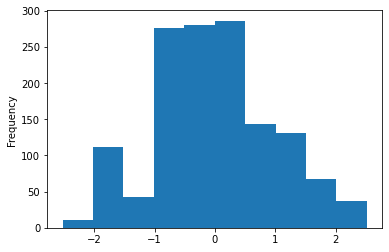

In [802]:
hr['TotalWorkingYears']=power_transform(hr[['TotalWorkingYears']], method='yeo-johnson')
hr['TotalWorkingYears'].plot.hist()
print(skew(hr['TotalWorkingYears']))

<AxesSubplot:ylabel='Frequency'>

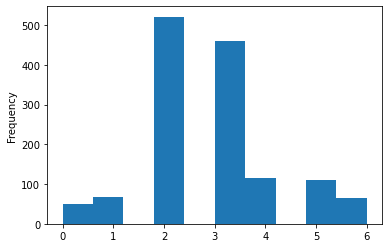

In [803]:
hr['TrainingTimesLastYear'].plot.hist()


0.057886470366446535


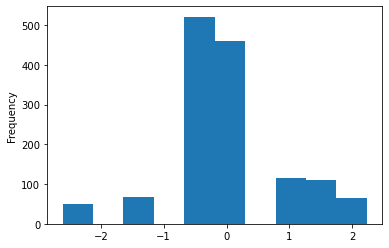

In [804]:
hr['TrainingTimesLastYear']=power_transform(hr[['TrainingTimesLastYear']], method='yeo-johnson')
hr['TrainingTimesLastYear'].plot.hist()
print(skew(hr['TrainingTimesLastYear']))

<AxesSubplot:ylabel='Frequency'>

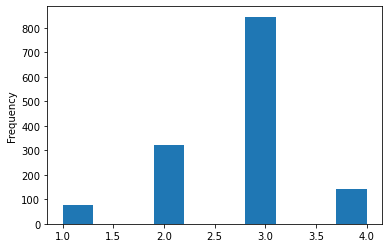

In [805]:
hr['WorkLifeBalance'].plot.hist()


-0.0111213503750803


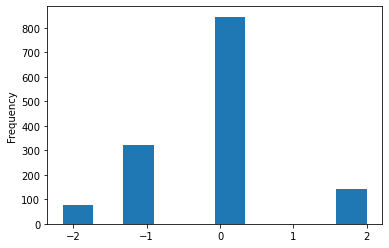

In [806]:
hr['WorkLifeBalance']=power_transform(hr[['WorkLifeBalance']], method='yeo-johnson')
hr['WorkLifeBalance'].plot.hist()
print(skew(hr['WorkLifeBalance']))

<AxesSubplot:ylabel='Frequency'>

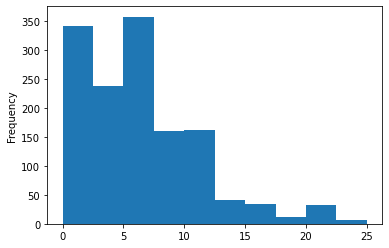

In [807]:
hr['YearsAtCompany'].plot.hist()


-0.02520291577994208


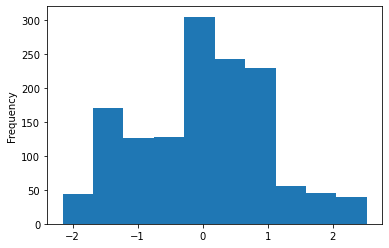

In [808]:
hr['YearsAtCompany']=power_transform(hr[['YearsAtCompany']], method='yeo-johnson')
hr['YearsAtCompany'].plot.hist()
print(skew(hr['YearsAtCompany']))

<AxesSubplot:ylabel='Frequency'>

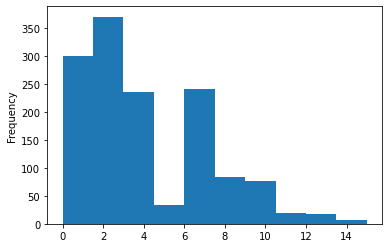

In [809]:
hr['YearsInCurrentRole'].plot.hist()


-0.06955569929503436


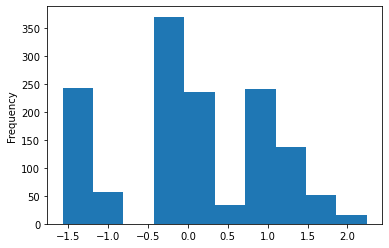

In [810]:
hr['YearsInCurrentRole']=power_transform(hr[['YearsInCurrentRole']], method='yeo-johnson')
hr['YearsInCurrentRole'].plot.hist()
print(skew(hr['YearsInCurrentRole']))

<AxesSubplot:ylabel='Frequency'>

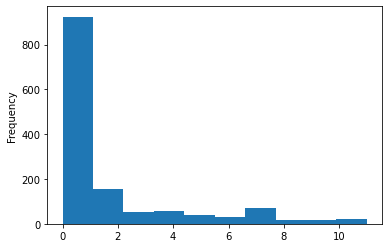

In [811]:
hr['YearsSinceLastPromotion'].plot.hist()


0.2120708543740205


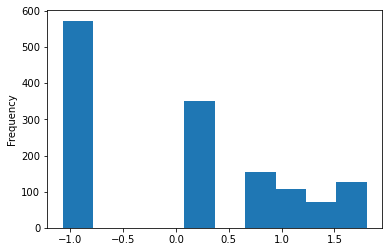

In [812]:
hr['YearsSinceLastPromotion']=power_transform(hr[['YearsSinceLastPromotion']], method='yeo-johnson')
hr['YearsSinceLastPromotion'].plot.hist()
print(skew(hr['YearsSinceLastPromotion']))

<AxesSubplot:ylabel='Frequency'>

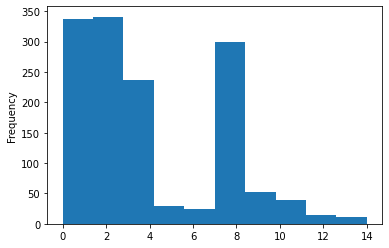

In [813]:
hr['YearsWithCurrManager'].plot.hist()


-0.07049316327724457


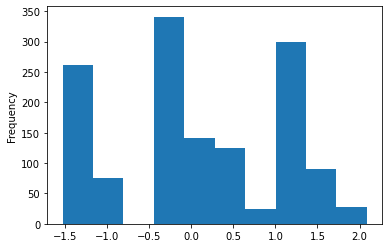

In [814]:
hr['YearsWithCurrManager']=power_transform(hr[['YearsWithCurrManager']], method='yeo-johnson')
hr['YearsWithCurrManager'].plot.hist()
print(skew(hr['YearsWithCurrManager']))

# Converting Objects to categorical data

In [815]:
hr.Attrition.replace({'Yes':1, 'No':0}, inplace=True)

hr.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2}, inplace=True)

hr.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2, }, inplace=True)

hr.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)


hr.OverTime.replace({'No': 0, 'Yes':1}, inplace=True)

hr.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2,'Technical Degree': 3, 'Human Resources': 4, 'Other':5}, 
                            inplace=True)

hr.JobRole.replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,
                     'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5,
                     'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}, inplace=True)

hr.MaritalStatus.replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)

In [816]:

temp_dum= pd.get_dummies(hr)
temp_dum.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,-1.489968,2,2,94,0.322170,0.349828,4,0.386674,...,-1.073534,0.582177,1,1,0,0,0,0,0,1
1,49,279,0.244561,1,3,61,-1.065841,0.349828,2,0.144235,...,0.193168,1.018073,0,2,1,0,1,1,1,0
2,37,1373,-1.028366,2,4,92,-1.065841,-1.141761,3,-1.431153,...,-1.073534,-1.528426,1,1,1,5,1,2,0,1
3,33,1392,-0.698191,4,4,56,0.322170,-1.141761,3,-0.814425,...,1.027520,-1.528426,0,2,1,0,0,1,1,1
4,27,591,-1.028366,1,1,40,0.322170,-1.141761,2,-0.504453,...,0.722874,-0.347871,0,1,1,1,1,2,1,0


# Splitting data

In [817]:
x = temp_dum.drop(columns=['Attrition'])
y = temp_dum['Attrition'] 

In [818]:
from sklearn.preprocessing import StandardScaler 
x_features = x
x = StandardScaler().fit_transform(x)

In [819]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# Performing ML

In [820]:

models = []
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('Random forest', RandomForestClassifier()))



# evaluate each model in turn


for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)
    




    msg = "%s:\n Training Score: %f \n Testing Score: %f " % (name,a,b)
    print(msg)
    print('\n')
    print(classification_report(y_test, y_pred))

    sc = cross_val_score(model, x_test, y_test, cv=35)
    acc=accuracy_score(y_test, y_pred)
    

 
   
    print('Cross val score is :',sc.mean())
    print('\n ')
    acc=accuracy_score(y_test, y_pred)
    print('Difference between accuracy score and cross validation score is :',acc-sc.mean())
   
    print('\n --------------------------------------------------------\n')
    
    #print(y_pred)
    

AdaBoost:
 Training Score: 0.911538 
 Testing Score: 0.861671 


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       291
           1       0.59      0.48      0.53        56

    accuracy                           0.86       347
   macro avg       0.75      0.71      0.72       347
weighted avg       0.85      0.86      0.86       347

Cross val score is : 0.8301587301587302

 
Difference between accuracy score and cross validation score is : 0.031512739581903815

 --------------------------------------------------------

GradientBoosting:
 Training Score: 0.961538 
 Testing Score: 0.850144 


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       291
           1       0.59      0.23      0.33        56

    accuracy                           0.85       347
   macro avg       0.73      0.60      0.62       347
weighted avg       0.82      0.85      0.82       347

Cross val score is

# Hyper parameter tuning

In [821]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_test, y_test)
 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.844510 using {'max_features': 'sqrt', 'n_estimators': 1000}


# Saving model

In [823]:
import joblib
joblib.dump(model,"HR.obj")

['HR.obj']